<a href="https://colab.research.google.com/github/fernandezja/mti-ia/blob/main/plot_ols_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ordinary Least Squares and Ridge Regression

1. Ordinary Least Squares:
   We illustrate how to use the ordinary least squares (OLS) model,
   :class:`~sklearn.linear_model.LinearRegression`, on a single feature of
   the diabetes dataset. We train on a subset of the data, evaluate on a
   test set, and visualize the predictions.

2. Ordinary Least Squares and Ridge Regression Variance:
   We then show how OLS can have high variance when the data is sparse or
   noisy, by fitting on a very small synthetic sample repeatedly. Ridge
   regression, :class:`~sklearn.linear_model.Ridge`, reduces this variance
   by penalizing (shrinking) the coefficients, leading to more stable
   predictions.


In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

## Data Loading and Preparation

Load the diabetes dataset. For simplicity, we only keep a single feature in the data.
Then, we split the data and target into training and test sets.



In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

## Linear regression model

We create a linear regression model and fit it on the training data. Note that by
default, an intercept is added to the model. We can control this behavior by setting
the `fit_intercept` parameter.



In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

## Model evaluation

We evaluate the model's performance on the test set using the mean squared error
and the coefficient of determination.



In [4]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


## Plotting the results

Finally, we visualize the results on the train and test data.



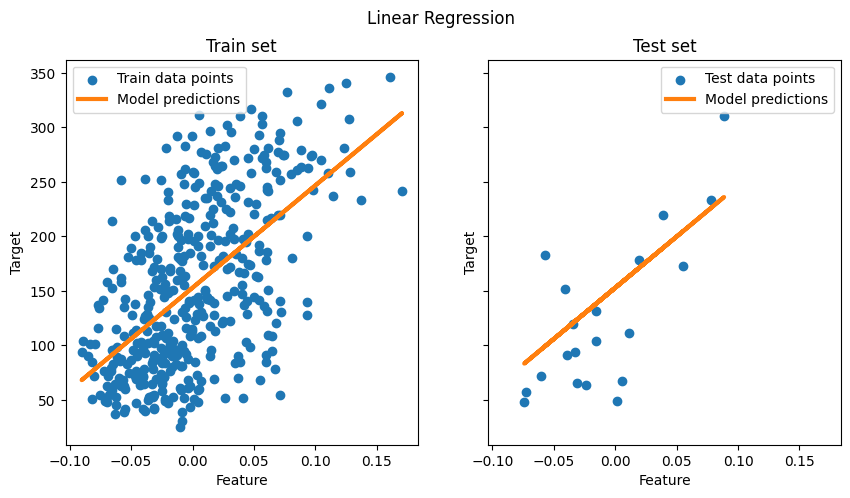

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

OLS on this single-feature subset learns a linear function that minimizes
the mean squared error on the training data. We can see how well (or poorly)
it generalizes by looking at the R^2 score and mean squared error on the
test set. In higher dimensions, pure OLS often overfits, especially if the
data is noisy. Regularization techniques (like Ridge or Lasso) can help
reduce that.



## Ordinary Least Squares and Ridge Regression Variance

Next, we illustrate the problem of high variance more clearly by using
a tiny synthetic dataset. We sample only two data points, then repeatedly
add small Gaussian noise to them and refit both OLS and Ridge. We plot
each new line to see how much OLS can jump around, whereas Ridge remains
more stable thanks to its penalty term.



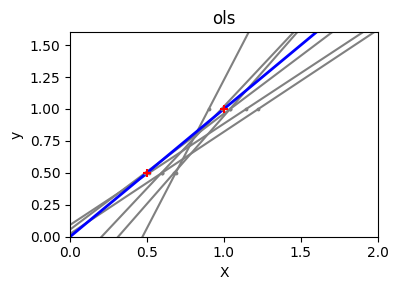

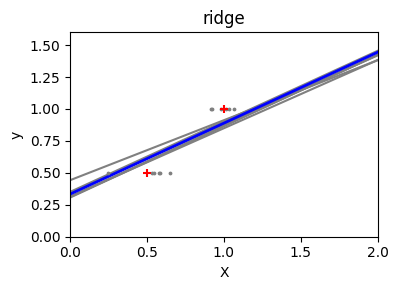

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

## Conclusion

- In the first example, we applied OLS to a real dataset, showing
  how a plain linear model can fit the data by minimizing the squared error
  on the training set.

- In the second example, OLS lines varied drastically each time noise
  was added, reflecting its high variance when data is sparse or noisy. By
  contrast, **Ridge** regression introduces a regularization term that shrinks
  the coefficients, stabilizing predictions.

Techniques like :class:`~sklearn.linear_model.Ridge` or
:class:`~sklearn.linear_model.Lasso` (which applies an L1 penalty) are both
common ways to improve generalization and reduce overfitting. A well-tuned
Ridge or Lasso often outperforms pure OLS when features are correlated, data
is noisy, or sample size is small.

